In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Get data from NY State open data API

In [40]:
# Get data from NY State open data portal and store in df

subway_stations_url = "https://data.ny.gov/resource/i9wp-a4ja.csv?$limit=500000"

subway_stations = pd.read_csv(subway_stations_url)

subway_stations.head()

,division,line,borough,station_name,station_latitude,station_longitude,daytime_routes,entrance_type,entry,exit_only,vending,staffing,staff_hours,north_south_street,east_west_street,corner,entrance_latitude,entrance_longitude,entrance_georeference,station_georeference
0,IND,Rockaway,Q,Far Rockaway-Mott Av,40.603995,-73.755405,A,Door,YES,NO,YES,FULL,NaN,Beach 22nd St,Mott Ave,SW,40.604657,-73.754178,POINT (-73.754178 40.604657),POINT (-73.755405 40.603995)
1,IND,Rockaway,Q,Beach 25th St,40.600066,-73.761353,A,Stair,YES,NO,YES,FULL,NaN,Beach 25th St,Rockaway Frwy,NW,40.599708,-73.761959,POINT (-73.761959 40.599708),POINT (-73.761353 40.600066)
2,IND,Rockaway,Q,Beach 25th St,40.600066,-73.761353,A,Stair,YES,NO,YES,FULL,NaN,Beach 25th St,Rockaway Frwy,SW,40.599427,-73.761807,POINT (-73.761807 40.599427),POINT (-73.761353 40.600066)
3,IND,Rockaway,Q,Beach 25th St,40.600066,-73.761353,A,Stair,YES,NO,YES,FULL,NaN,Beach 25th St,Rockaway Frwy,SW,40.599670,-73.761596,POINT (-73.761596 40.59967),POINT (-73.761353 40.600066)
4,IND,Rockaway,Q,Beach 36th St,40.595398,-73.768175,A,Stair,YES,NO,YES,FULL,NaN,Beach 36th,Edgemere Ave,NE,40.595445,-73.768313,POINT (-73.768313 40.595445),POINT (-73.768175 40.595398)


# Initial data cleaning
1. Select only the columns that we care about
2. Remove duplicates
3. Add column uniquely identifying an entrance

In [43]:
# We will base station accessibility on the entrance locations, so we only need those columns

subway_stations = subway_stations[["station_name", "entrance_latitude", "entrance_longitude"]]

In [44]:
# here we can see that some entrances have duplicate entries 
subway_stations_agg = subway_stations \
    .groupby(by=["entrance_latitude", "entrance_longitude"]) \
    .count() \
    .sort_values("station_name", ascending=False) \
    .reset_index()

max(subway_stations_agg["station_name"])

2

In [45]:
# drop the duplicates
subway_stations = subway_stations.drop_duplicates()

# confirm that no entrance locations have multiple records anymore
subway_stations_deduped_agg = subway_stations \
    .groupby(by=["entrance_latitude", "entrance_longitude"]) \
    .count() \
    .sort_values("station_name", ascending=False) \
    .reset_index()

max(subway_stations_deduped_agg["station_name"])

1

In [84]:
# give each entrance a numerical ID
subway_stations['entrance_number'] = subway_stations.sort_values(["entrance_latitude", "entrance_longitude"]) \
             .groupby(['station_name']) \
             .cumcount() + 1

subway_stations.reset_index(drop=True)

# concatenate the station name and entrance ID to create a unique name for the entrance
subway_stations['station_entrance'] = subway_stations['station_name'] + " entrance " + subway_stations['entrance_number'].astype(str)

subway_stations.sort_values(["station_name", "entrance_number"]).head(20)


,station_name,entrance_latitude,entrance_longitude,entrance_number,station_entrance
209,103rd St,40.749775,-73.862537,1,103rd St entrance 1
208,103rd St,40.749787,-73.862389,2,103rd St entrance 2
210,103rd St,40.749964,-73.862546,3,103rd St entrance 3
207,103rd St,40.749973,-73.862425,4,103rd St entrance 4
784,103rd St,40.790193,-73.947649,5,103rd St entrance 5
785,103rd St,40.790279,-73.947856,6,103rd St entrance 6
966,103rd St,40.796263,-73.961610,7,103rd St entrance 7
1028,103rd St,40.799142,-73.968314,8,103rd St entrance 8
1026,103rd St,40.799223,-73.968271,9,103rd St entrance 9
1027,103rd St,40.799282,-73.968679,10,103rd St entrance 10


# Descriptive analysis
Check the latitude and longitude values to ensure that all points are in NYC

<Axes: xlabel='entrance_longitude', ylabel='entrance_latitude'>

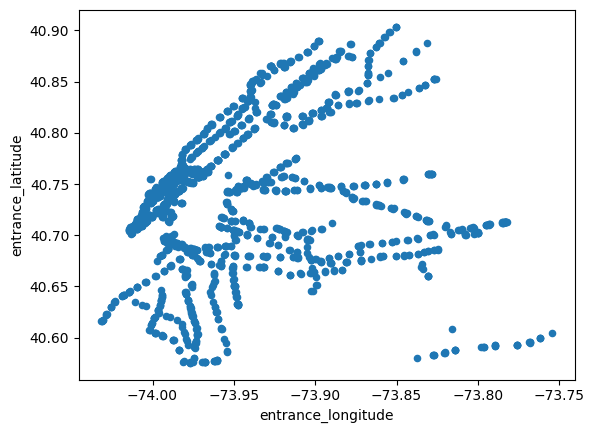

In [87]:
subway_stations.plot(x="entrance_longitude", y="entrance_latitude", kind="scatter")

In [88]:
subway_stations.describe()

,entrance_latitude,entrance_longitude,entrance_number
count,1857.000000,1857.000000,1857.000000
mean,40.734242,-73.943373,5.262251
std,0.070508,0.057329,5.688922
min,40.575499,-74.031383,1.000000
25%,40.689995,-73.987481,2.000000
50%,40.734180,-73.958044,3.000000
75%,40.767677,-73.910999,6.000000
max,40.903597,-73.754178,41.000000


Visually, it appears that all datapoints fall within NYC, and the max/min latitude and longitude make sense for the city.

# Export results
Save results to csv to easily reference in future analyses

In [89]:
subway_stations.to_csv('subway_stations.csv', index=False)